# WeatherPy
----


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import statsmodels.api as sm
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


655

## Perform API Calls


### Testing City Outputs

In [4]:
cities[0:4]

['sioux lookout', 'sterling', 'ushuaia', 'arraial do cabo']

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [6]:
 # Build query URL and request your results in Celsius
city = "sterling"
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

# Get weather data
weather_response = requests.get(query_url)
print(weather_response.status_code)
weather_json = weather_response.json()

200


In [7]:
type(weather_json)

dict

In [8]:
weather_json.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [9]:
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 39.0062, 'lon': -77.4286},
 'dt': 1644028479,
 'id': 4787534,
 'main': {'feels_like': 33.93,
          'humidity': 79,
          'pressure': 1020,
          'temp': 33.93,
          'temp_max': 37.06,
          'temp_min': 30.24},
 'name': 'Sterling',
 'sys': {'country': 'US',
         'id': 2004257,
         'sunrise': 1643976805,
         'sunset': 1644014031,
         'type': 2},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 350, 'gust': 8.01, 'speed': 1.99}}


### API calls on cities

In [37]:
#place Into
lats = []
lngs = []
countries = []
clouds = []
dates = []
names = []
winds = []
temps = []
pressures = []
humids = []
count = 0
#loop through cities
for city in cities[0:10]:
    count += 1
    
    # make request
    print(f'Processing {count} | {city}')
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Get weather data & show if city found
    weather_response = requests.get(query_url)
    if weather_response.status_code == 404 :
        print('City Not Found Skipping...')
        print()
    else:
        print('CityFound')
        print()
    
   #appned if found if not add NaN
    try:
        # get data
        weather_json = weather_response.json()

        # parse the data
        lat = weather_json["coord"]["lat"]
        lng = weather_json["coord"]["lon"]
        country = weather_json["sys"]["country"]
        cloudiness = weather_json["clouds"]["all"]

        date_dt = weather_json["dt"]
        city_name = weather_json["name"]
        wind = weather_json["wind"]["speed"]

        temp = weather_json["main"]['temp']
        pressure = weather_json["main"]['pressure']
        humidity = weather_json["main"]['humidity']

        # appending info
        lats.append(lat)
        lngs.append(lng)
        countries.append(country)
        clouds.append(cloudiness)
        dates.append(date_dt)
        names.append(city_name)
        winds.append(wind)
        temps.append(temp)
        pressures.append(pressure)
        humids.append(humidity)
            
    except Exception as e:
        print(e)
        
        # appending info
        lats.append(np.nan)
        lngs.append(np.nan)
        countries.append(None)
        clouds.append(np.nan)
        dates.append(np.nan)
        names.append(city)
        winds.append(np.nan)
        temps.append(np.nan)
        pressures.append(np.nan)
        humids.append(np.nan)
        
    time.sleep(1)

Processing 1 | sioux lookout
CityFound

Processing 2 | sterling
CityFound

Processing 3 | ushuaia
CityFound

Processing 4 | arraial do cabo
CityFound

Processing 5 | alta floresta
CityFound

Processing 6 | clyde river
CityFound

Processing 7 | avarua
CityFound

Processing 8 | nizhneyansk
City Not Found Skipping...

'coord'
Processing 9 | berlevag
CityFound

Processing 10 | marawi
CityFound



### Convert Raw Data to DataFrame & export to CSV


In [33]:
#dataframe from Api calls
df = pd.DataFrame()

df["City"] = names
df["Lat"] = lats
df["Lng"] = lngs
df["Max_Temp"] = temps
df["Humidity"] = humids
df["Cloudiness"]=clouds
df["Wind_Speed"] = winds
df["Country"] = countries
df["Date"] = dates
df["Pressure"] = pressures


df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date,Pressure
0,Sioux Lookout,50.1001,-91.9170,-16.53,76.0,0.0,2.30,CA,1.644030e+09,1026.0
1,Sterling,39.0062,-77.4286,33.71,78.0,100.0,1.99,US,1.644029e+09,1020.0
2,Ushuaia,-54.8000,-68.3000,47.86,71.0,0.0,6.91,AR,1.644029e+09,1015.0
3,Arraial do Cabo,-22.9661,-42.0278,75.81,87.0,100.0,22.39,BR,1.644030e+09,1011.0
4,Alta Floresta,-9.8756,-56.0861,71.47,96.0,51.0,2.53,BR,1.644030e+09,1012.0


In [34]:
#Export to CSV
df.to_csv("WeatherData.csv", index=False)

In [35]:
filepath = '../Submission/WeatherData.csv'
df1 = pd.read_csv(filepath)
df1.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date,Pressure
0,Sioux Lookout,50.1001,-91.9170,-16.53,76.0,0.0,2.30,CA,1.644030e+09,1026.0
1,Sterling,39.0062,-77.4286,33.71,78.0,100.0,1.99,US,1.644029e+09,1020.0
2,Ushuaia,-54.8000,-68.3000,47.86,71.0,0.0,6.91,AR,1.644029e+09,1015.0
3,Arraial do Cabo,-22.9661,-42.0278,75.81,87.0,100.0,22.39,BR,1.644030e+09,1011.0
4,Alta Floresta,-9.8756,-56.0861,71.47,96.0,51.0,2.53,BR,1.644030e+09,1012.0


In [36]:
df1.describe()

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date,Pressure
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,6.030000e+02,603.000000
mean,19.909359,16.400500,48.002056,73.958541,58.860697,7.812371,1.644030e+09,1015.001658
std,32.595611,88.894985,30.670946,21.319043,41.095754,6.174335,2.857624e+02,10.726825
min,-54.800000,-179.166700,-35.790000,8.000000,0.000000,0.000000,1.644029e+09,962.000000
25%,-6.240400,-63.673900,25.475000,63.500000,11.000000,3.440000,1.644030e+09,1010.000000
50%,22.813400,21.688600,57.670000,80.000000,75.000000,6.020000,1.644030e+09,1014.000000
75%,47.836100,90.805200,73.400000,91.000000,100.000000,10.360000,1.644030e+09,1021.000000
max,78.218600,179.316700,109.810000,100.000000,100.000000,42.460000,1.644031e+09,1072.000000


## Inspect the data and remove the cities where the humidity > 100%.
----
No cities found with high humidity

In [3]:
filepath = '../Submission/WeatherData.csv'
df1 = pd.read_csv(filepath)
df1.describe()

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date,Pressure
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,6.030000e+02,603.000000
mean,19.909359,16.400500,48.002056,73.958541,58.860697,7.812371,1.644030e+09,1015.001658
std,32.595611,88.894985,30.670946,21.319043,41.095754,6.174335,2.857624e+02,10.726825
min,-54.800000,-179.166700,-35.790000,8.000000,0.000000,0.000000,1.644029e+09,962.000000
25%,-6.240400,-63.673900,25.475000,63.500000,11.000000,3.440000,1.644030e+09,1010.000000
50%,22.813400,21.688600,57.670000,80.000000,75.000000,6.020000,1.644030e+09,1014.000000
75%,47.836100,90.805200,73.400000,91.000000,100.000000,10.360000,1.644030e+09,1021.000000
max,78.218600,179.316700,109.810000,100.000000,100.000000,42.460000,1.644031e+09,1072.000000


## Plotting the Data


### Latitude vs. Temperature Plot

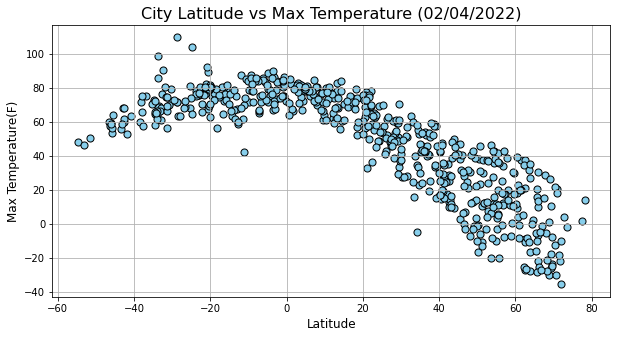

Plot shows a strong, negative, & non linear assosiation between max temperature and latitude. From -60 to 0 latitude max temperature tends to increase, from 0 to 80 latitude max temperature decreases.


In [43]:
x_values = df1.Lat
y_values = df1.Max_Temp

plt.figure(figsize=(10,5))
plt.scatter(x_values, y_values, color="skyblue",edgecolors="black", s=50)

plt.title('City Latitude vs Max Temperature (02/04/2022)', fontsize=16)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Max Temperature(F)', fontsize = 12)
plt.grid()
plt.savefig('LatvsTemp.png')
plt.show()
print('Plot shows a strong, negative, & non linear assosiation between max temperature and latitude. From -60 to 0 latitude max temperature tends to increase, from 0 to 80 latitude max temperature decreases.')

## Latitude vs. Humidity Plot

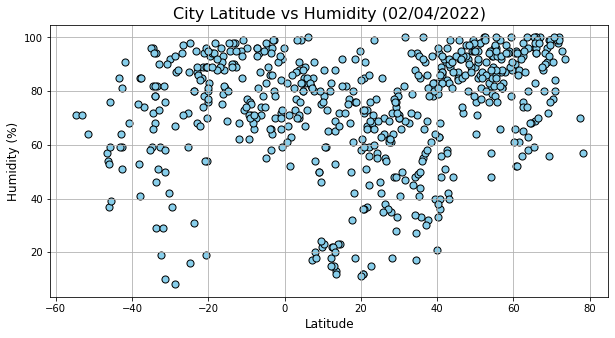

Plot shows weak assosiation betwen humidty and latitude. There does not seem to be trend with humidity and the latitude of cities. There might be other factors that contribute to a city humidity than latitude


In [44]:
x_values = df1.Lat
y_values = df1.Humidity

plt.figure(figsize=(10,5))
plt.scatter(x_values, y_values, color="skyblue",edgecolors="black", s=50)

plt.title('City Latitude vs Humidity (02/04/2022)', fontsize=16)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Humidity (%)', fontsize = 12)
plt.grid()
plt.savefig('LatvsHumidity.png')
plt.show()
print('Plot shows weak assosiation betwen humidty and latitude. There does not seem to be trend with humidity and the latitude of cities. There might be other factors that contribute to a city humidity than latitude') 

## Latitude vs. Cloudiness Plot

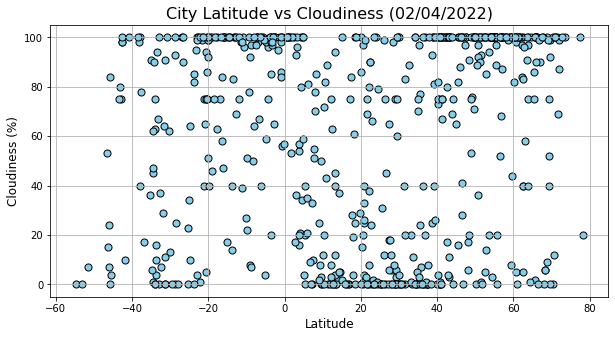

Plot shows weak, non linear associaton between city cloudiness % and latitudes. There does not seem to be trend between cloudiness and latitude. However, there are consentrations of cities with 100% cloudiness between latitues -20 to 0 and 40 to 70. there are also consentrations for 0 cloudines between latitudes 10 to 40.


In [45]:
x_values = df1.Lat
y_values = df1.Cloudiness

plt.figure(figsize=(10,5))
plt.scatter(x_values, y_values, color="skyblue",edgecolors="black", s=50)

plt.title('City Latitude vs Cloudiness (02/04/2022)', fontsize=16)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Cloudiness (%)', fontsize = 12)
plt.grid()
plt.savefig('Latvscloudiness.png')
plt.show()
print('Plot shows weak, non linear associaton between city cloudiness % and latitudes. There does not seem to be trend between cloudiness and latitude. However, there are consentrations of cities with 100% cloudiness between latitues -20 to 0 and 40 to 70. there are also consentrations for 0 cloudines between latitudes 10 to 40.')

## Latitude vs. Wind Speed Plot

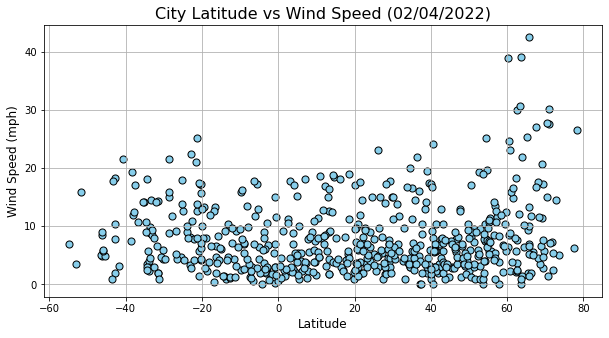

Plot shows weak association between wind speed in mph and latitudes. Most wind speeds seem to be below 20 mph between latitudes -40 to 70.


In [46]:
x_values = df1.Lat
y_values = df1.Wind_Speed

plt.figure(figsize=(10,5))
plt.scatter(x_values, y_values, color="skyblue",edgecolors="black", s=50)

plt.title('City Latitude vs Wind Speed (02/04/2022)', fontsize=16)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Wind Speed (mph)', fontsize = 12)
plt.grid()
plt.savefig('LatvsWindSpeed.png')
plt.show()
print('Plot shows weak association between wind speed in mph and latitudes. Most wind speeds seem to be below 20 mph between latitudes -40 to 70.')

## Linear Regression

In [13]:
#spliting dataframes into Northern Hemisphere and Southern Hemisphere 
mask1 = df1.Lat >= 0
north = df1.loc[mask1]

mask2 = df1.Lat<= 0
south = df1.loc[mask2]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8715.


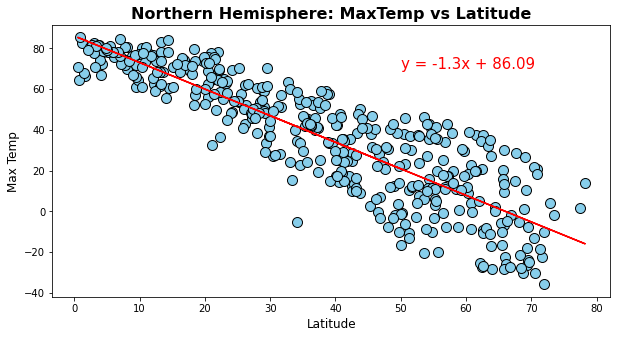

Plot compares max temperatures in the Northern Hemisphere. There is a negative good correlation between max temp and latitude. The further away a city is from the equator the lower the max temperature


In [47]:
x_values = north.Lat
y_values = north.Max_Temp

plt.figure(figsize=(10,5))
plt.scatter(x_values, y_values, color="skyblue",edgecolors="black", s=100)

plt.title('Northern Hemisphere: MaxTemp vs Latitude', fontsize=16, fontweight="bold")
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Max Temp', fontsize = 12)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,70),fontsize=15,color="red")
cc = north.loc[:, ["Lat", "Max_Temp"]].corr().values[0][1]
cc=round(cc, 4)
print(f'The r-value is: {cc}.')
plt.savefig('North-LatvsLat_Reg.png')
plt.show()
print ('Plot compares max temperatures in the Northern Hemisphere. There is a negative good correlation between max temp and latitude. The further away a city is from the equator the lower the max temperature')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4922.


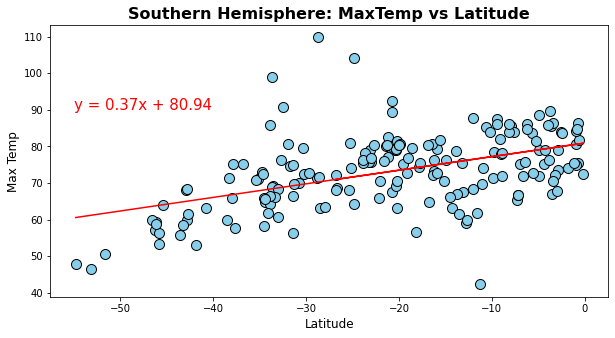

Plot compares max temperatures in the Southern Hemisphere. There is a positive correlation between max temp and latitude. The closer a city is from the equator the higher the max temperature


In [48]:
x_values = south.Lat
y_values = south.Max_Temp

plt.figure(figsize=(10,5))
plt.scatter(x_values, y_values, color="skyblue",edgecolors="black", s=100)

plt.title('Southern Hemisphere: MaxTemp vs Latitude', fontsize=16, fontweight="bold")
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Max Temp', fontsize = 12)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,90),fontsize=15,color="red")
cc = south.loc[:, ["Lat", "Max_Temp"]].corr().values[0][1]
cc=round(cc, 4)
print(f'The r-value is: {cc}.')
plt.savefig('South-TempvsLat_Reg.png')
plt.show()
print ('Plot compares max temperatures in the Southern Hemisphere. There is a positive correlation between max temp and latitude. The closer a city is from the equator the higher the max temperature')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.4175.


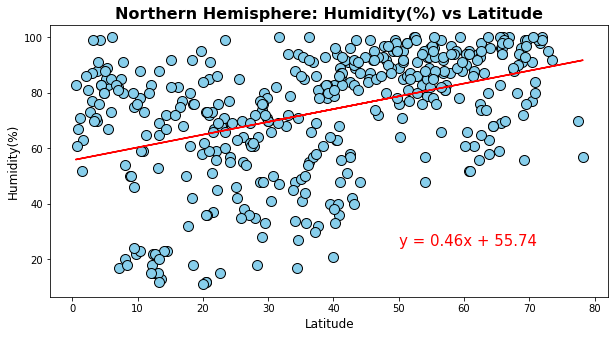

Plot shows humidity % for cities in the Northern Hemisphere. There is medium correlation between humidity and latitude.


In [49]:
x_values = north.Lat
y_values = north.Humidity

plt.figure(figsize=(10,5))
plt.scatter(x_values, y_values, color="skyblue",edgecolors="black", s=100)

plt.title('Northern Hemisphere: Humidity(%) vs Latitude', fontsize=16, fontweight="bold")
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Humidity(%)', fontsize = 12)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,25),fontsize=15,color="red")
cc = north.loc[:, ["Lat", "Humidity"]].corr().values[0][1]
cc=round(cc, 4)
print(f'The r-value is: {cc}.')
plt.savefig('North-HumidityvsLat_Reg.png')
plt.show()
print('Plot shows humidity % for cities in the Northern Hemisphere. There is medium correlation between humidity and latitude.')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3399.


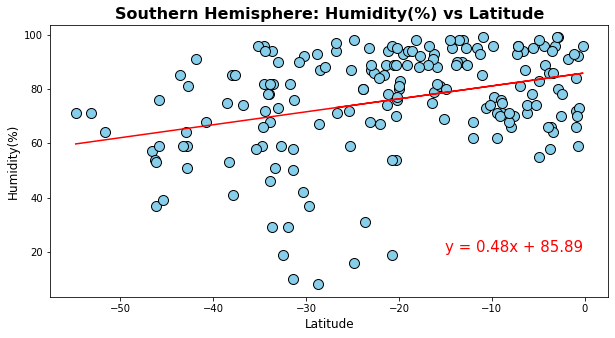

Plot shows humidity % for cities the Southern Hemisphere. There is a weak correlation between humidity and latitude


In [50]:
x_values = south.Lat
y_values = south.Humidity

plt.figure(figsize=(10,5))
plt.scatter(x_values, y_values, color="skyblue",edgecolors="black", s=100)

plt.title('Southern Hemisphere: Humidity(%) vs Latitude', fontsize=16, fontweight="bold")
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Humidity(%)', fontsize = 12)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-15,20),fontsize=15,color="red")
cc = south.loc[:, ["Lat", "Humidity"]].corr().values[0][1]
cc=round(cc, 4)
print(f'The r-value is: {cc}.')
plt.savefig('South-HumidityvsLat_Reg.png')
plt.show()
print('Plot shows humidity % for cities the Southern Hemisphere. There is a weak correlation between humidity and latitude')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.3542.


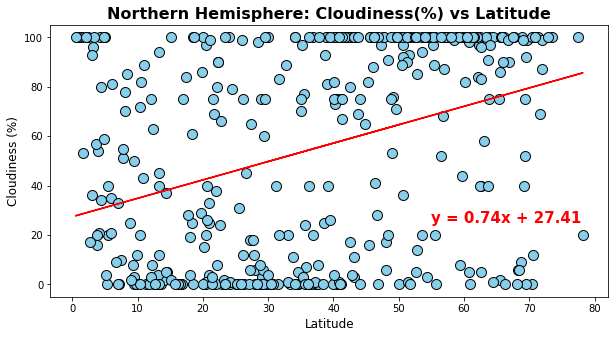

Plot shows Cloudiness % for cities the Northern Hemisphere. Plot show positive slope indicating the further a city is to the equator the more cloudiness. However, there is a weak correlation between cloudiness and latitude


In [51]:
x_values = north.Lat
y_values = north.Cloudiness

plt.figure(figsize=(10,5))
plt.scatter(x_values, y_values, color="skyblue",edgecolors="black", s=100)

plt.title('Northern Hemisphere: Cloudiness(%) vs Latitude', fontsize=16, fontweight="bold")
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Cloudiness (%)', fontsize = 12)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55,25),fontsize=15,color="red", fontweight = 'bold')
cc = north.loc[:, ["Lat", "Cloudiness"]].corr().values[0][1]
cc=round(cc, 4)
print(f'The r-value is: {cc}.')
plt.savefig('North-CloudinessvsLat_Reg.png')
plt.show()
print('Plot shows Cloudiness % for cities the Northern Hemisphere. Plot show positive slope indicating the further a city is to the equator the more cloudiness. However, there is a weak correlation between cloudiness and latitude')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.4111.


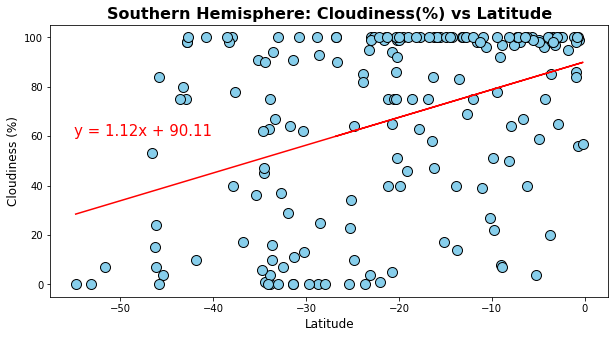

Plot shows Cloudiness % for cities the Southern Hemisphere.  Plot show positive slope indicating the closer a city is to the equator the more cloudiness. However, there is a weak correlation between cloudiness and latitude.


In [52]:
x_values = south.Lat
y_values = south.Cloudiness

plt.figure(figsize=(10,5))
plt.scatter(x_values, y_values, color="skyblue",edgecolors="black", s=100)

plt.title('Southern Hemisphere: Cloudiness(%) vs Latitude', fontsize=16, fontweight="bold")
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Cloudiness (%)', fontsize = 12)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")
cc = south.loc[:, ["Lat", "Cloudiness"]].corr().values[0][1]
cc=round(cc, 4)
print(f'The r-value is: {cc}.')
plt.savefig('South-CloudinessvsLat_Reg.png')
plt.show()
print('Plot shows Cloudiness % for cities the Southern Hemisphere.  Plot show positive slope indicating the closer a city is to the equator the more cloudiness. However, there is a weak correlation between cloudiness and latitude.')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.2009.


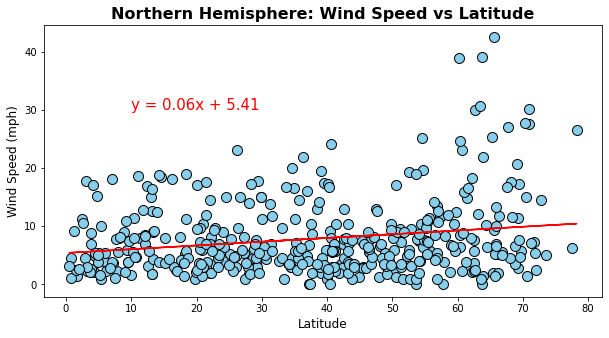

Plot shows wind speed in mph for cities in the Northern Hemisphere. There is a positive slope showing the further a city is from the equator the higher the winds. However, there is a weak correlation between wind speed and latitude.


In [53]:
x_values = north.Lat
y_values = north.Wind_Speed

plt.figure(figsize=(10,5))
plt.scatter(x_values, y_values, color="skyblue",edgecolors="black", s=100)

plt.title('Northern Hemisphere: Wind Speed vs Latitude', fontsize=16, fontweight="bold")
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Wind Speed (mph)', fontsize = 12)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="red")
cc = north.loc[:, ["Lat", "Wind_Speed"]].corr().values[0][1]
cc=round(cc, 4)
print(f'The r-value is: {cc}.')
plt.savefig('North-WindSpeedvsLat_Reg.png')
plt.show()
print('Plot shows wind speed in mph for cities in the Northern Hemisphere. There is a positive slope showing the further a city is from the equator the higher the winds. However, there is a weak correlation between wind speed and latitude.')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.2334.


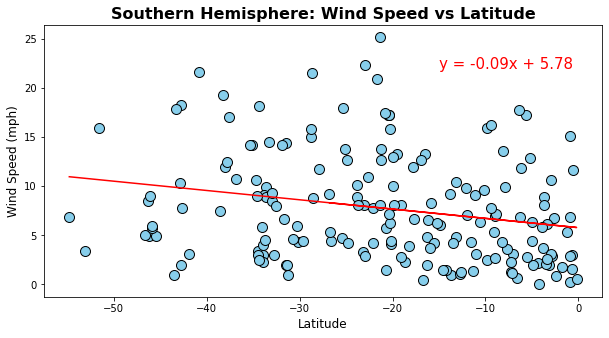

Plot shows Wind Speed in mph for cities the Southern Hemisphere.There is a negative slope showing that the closer a city is to the equator the lower the winds. However, there is a weak correlation between wind speed and latitude.


In [54]:
x_values = south.Lat
y_values = south.Wind_Speed

plt.figure(figsize=(10,5))
plt.scatter(x_values, y_values, color="skyblue",edgecolors="black", s=100)

plt.title('Southern Hemisphere: Wind Speed vs Latitude', fontsize=16, fontweight="bold")
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Wind Speed (mph)', fontsize = 12)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-15,22),fontsize=15,color="red")
cc = south.loc[:, ["Lat", "Wind_Speed"]].corr().values[0][1]
cc=round(cc, 4)
print(f'The r-value is: {cc}.')
plt.savefig('South-WindSpeedvsLat_Reg.png')
plt.show()
print('Plot shows Wind Speed in mph for cities the Southern Hemisphere.There is a negative slope showing that the closer a city is to the equator the lower the winds. However, there is a weak correlation between wind speed and latitude.')